In [2]:
#Importing Libraries

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

c:\Users\Legion\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# load audio file with Librosa

FIG_SIZE = (15,10)
file = "blues.00000.wav"
signal, sample_rate = librosa.load(file, sr=22050)

C:\Users\Legion\AppData\Local\Temp\ipykernel_18568\149943227.py:5: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sample_rate, alpha=0.4)


Text(0.5, 1.0, 'Waveform')

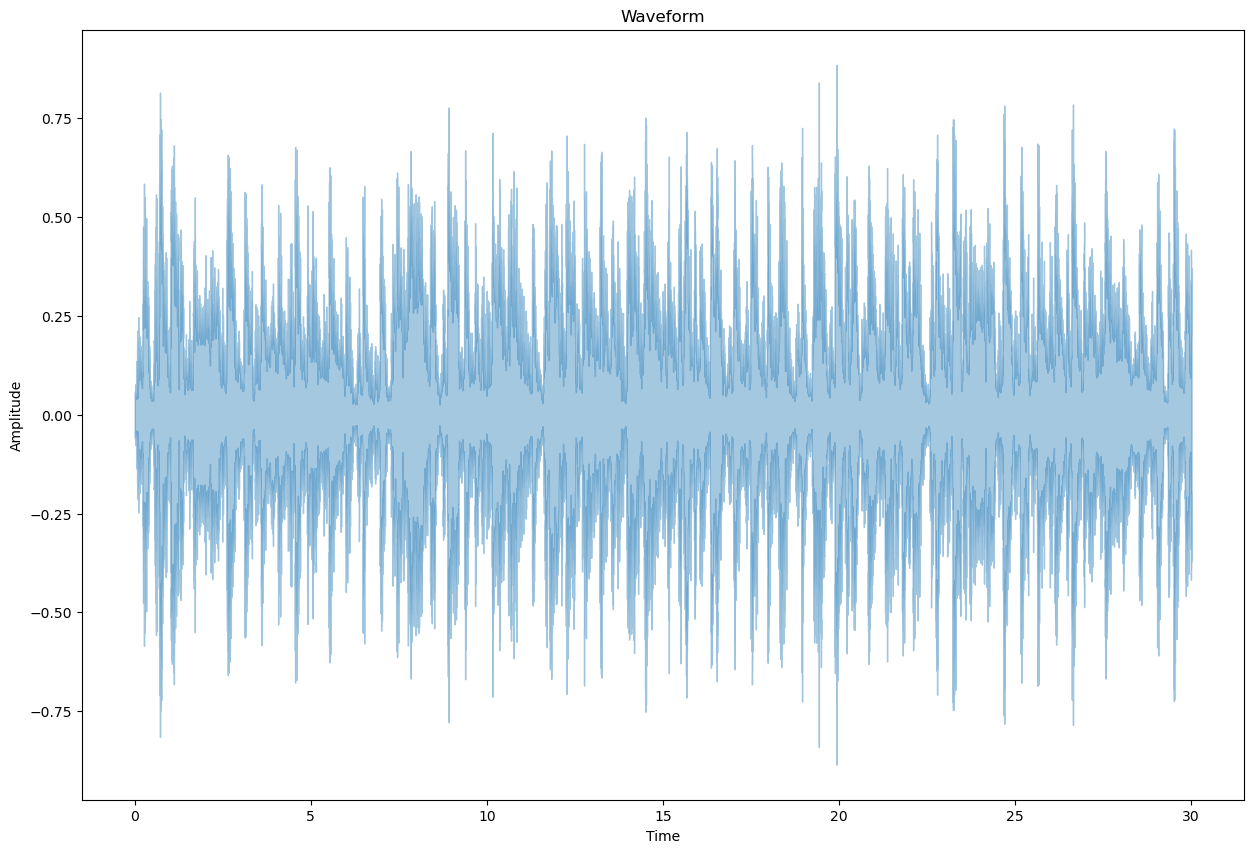

In [4]:
# WAVEFORM
# display waveform

plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [5]:
# FFT -> power spectrum
# perform Fourier transform

fft = np.fft.fft(signal)

In [6]:
# calculate abs values on complex numbers to get magnitude

spectrum = np.abs(fft)

In [7]:
# create frequency variable

f = np.linspace(0, sample_rate, len(spectrum))

In [8]:
# take half of the spectrum and frequency

left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

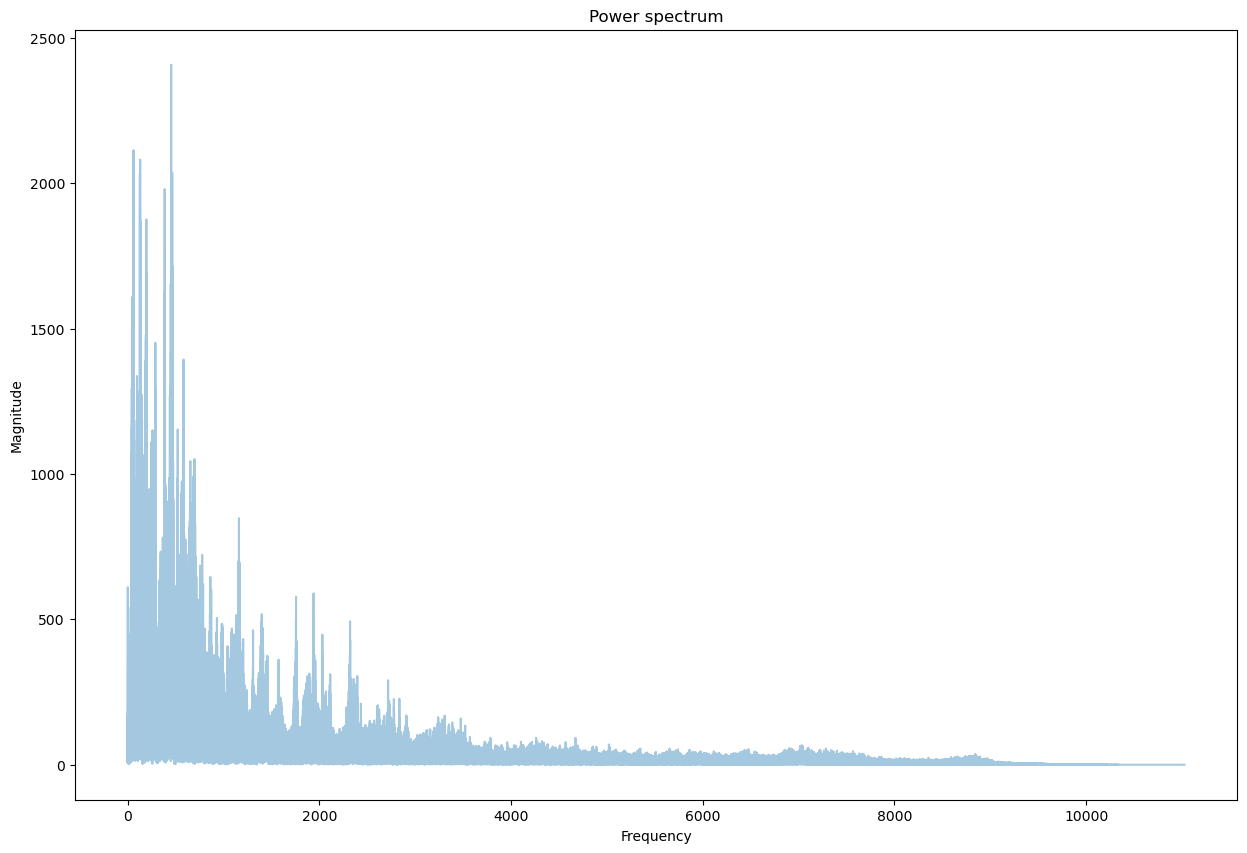

In [9]:
# plot spectrum

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [10]:
# STFT -> spectrogram

hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples


In [11]:
# calculate duration hop length and window in seconds

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [12]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [13]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

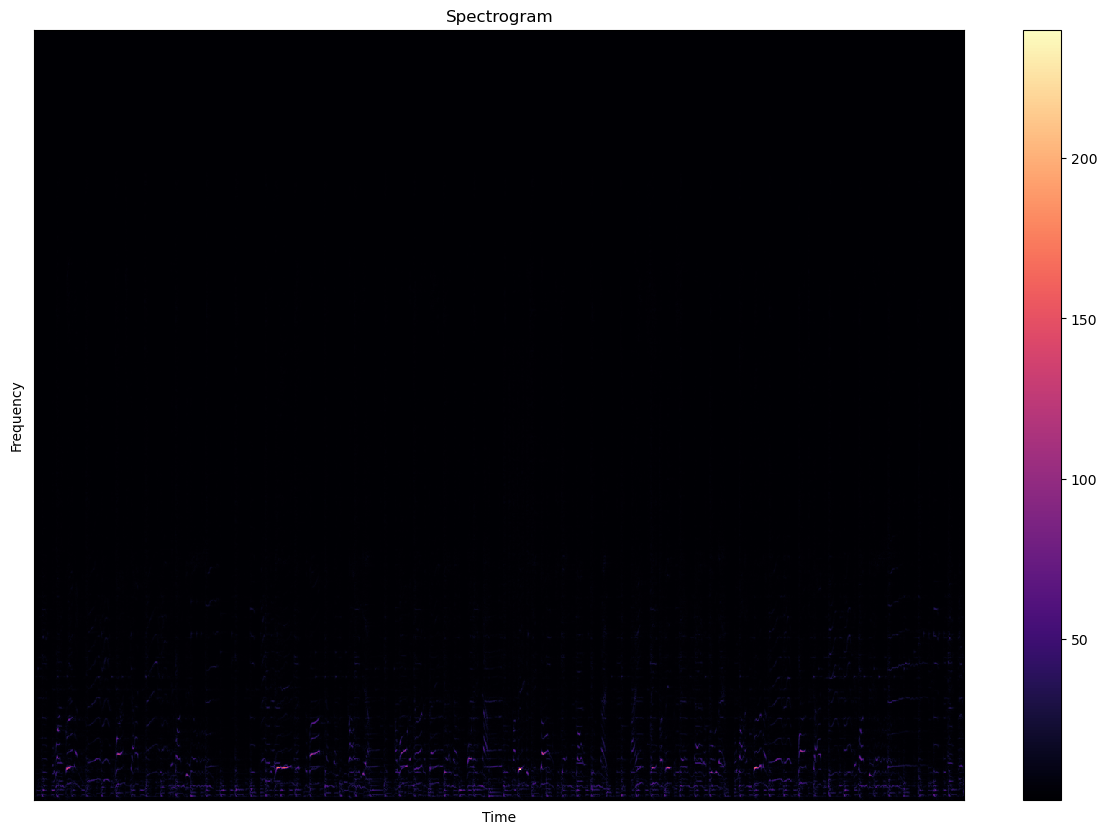

In [14]:
# display spectrogram

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

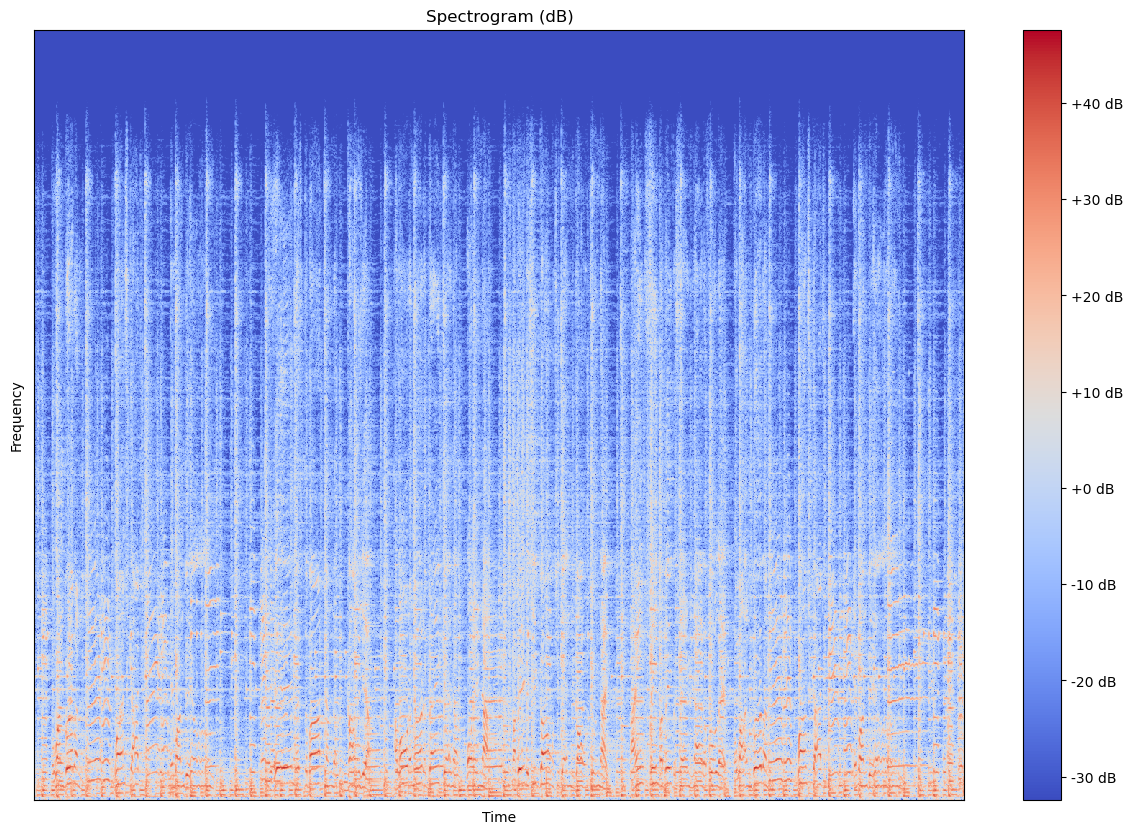

In [15]:
# apply logarithm to cast amplitude to Decibels

log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [16]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

C:\Users\Legion\AppData\Local\Temp\ipykernel_18568\1113811453.py:3: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


Text(0.5, 1.0, 'MFCCs')

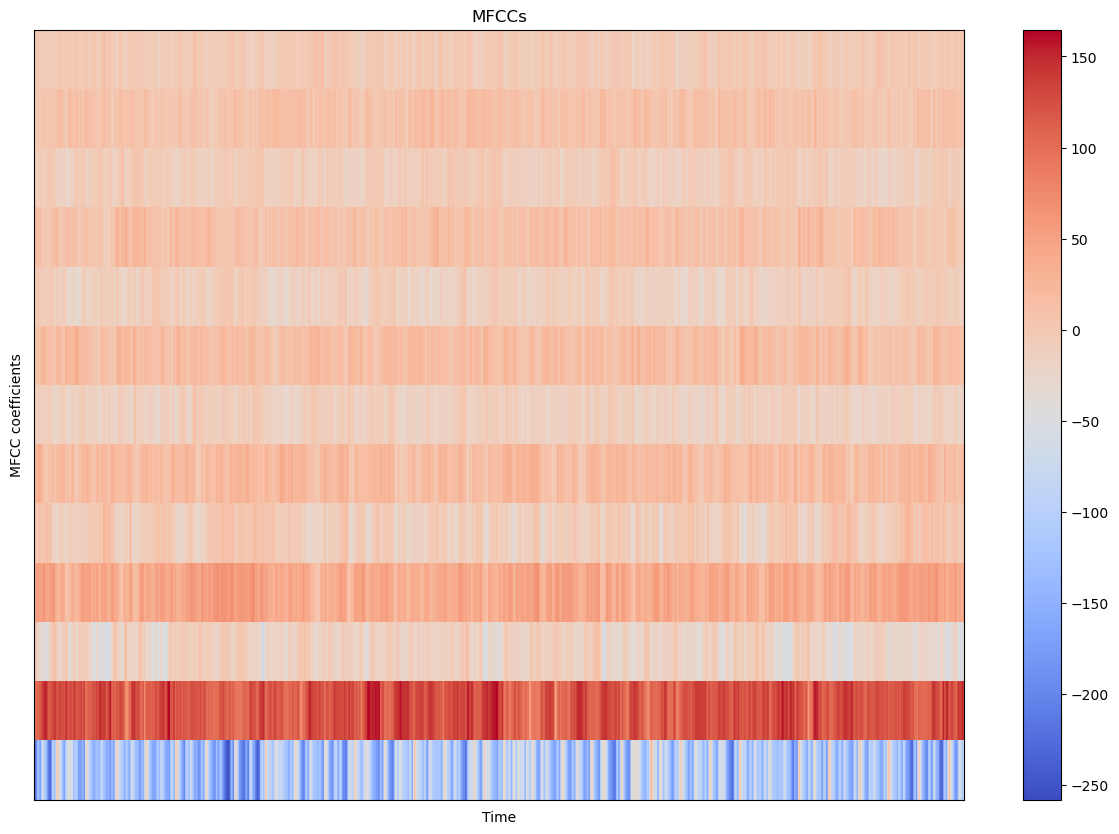

In [17]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")